In [1]:
# 기본 패키지 추가
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import scipy as sp 
import matplotlib as mpl

# matplolib, 폰트설정
from matplotlib import rc
import matplotlib.font_manager as fm 

plt.rcParams['font.family']=['NanumBarunGothic.ttf']
plt.rcParams['font.size']=14
# plt.rc('font', family ='NanumSquareRoundR')
sns.set(font = 'Malgun Gothic' ,rc={'axes.unicode_minus':False}, style='darkgrid')

#### 합성곱 신경망 이미지 분류 - 데이터 준비

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [3]:
(train_input,train_target),(test_input,test_target) = load_data()

In [4]:
train_scaled = train_input.reshape(-1,28,28,1) /255.0

In [5]:
train_scaled.shape

(60000, 28, 28, 1)

In [6]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target, test_size=0.2, random_state=42)


In [9]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


#### 합성곱 신경망 만들기

In [13]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2)) #14*14 특성맵 =32개 만들어진다.
model.add(keras.layers.Conv2D(64,kernel_size=3, activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D(2))  # 7*7 특성맵 64개

In [15]:
model.add(keras.layers.Flatten())   #7*7*64 = 3136
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))  # 60개만 쓰겠다.
model.add(keras.layers.Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

In [17]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### 모델컴파일훈련

In [18]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_cnn_model.h5',save_best_only=True,verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True,verbose=1)
history=model.fit(train_scaled,train_target,epochs=20, verbose=1, validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - ETA: 0s - loss: 0.5152 - accuracy: 0.8161
Epoch 1: val_loss improved from inf to 0.33544, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.5152 - accuracy: 0.8161 - val_loss: 0.3354 - val_accuracy: 0.8780
Epoch 2/20
1500/1500 [==============================] - ETA: 0s - loss: 0.3396 - accuracy: 0.8788
Epoch 2: val_loss improved from 0.33544 to 0.28113, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.3396 - accuracy: 0.8788 - val_loss: 0.2811 - val_accuracy: 0.8983
Epoch 3/20
1500/1500 [==============================] - ETA: 0s - loss: 0.2904 - accuracy: 0.8948
Epoch 3: val_loss improved from 0.28113 to 0.25040, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2904 - accuracy: 0.8948 - val_loss: 0.2504 - val_accuracy: 0.9059
Epoch 4/20
1500/1500 [====

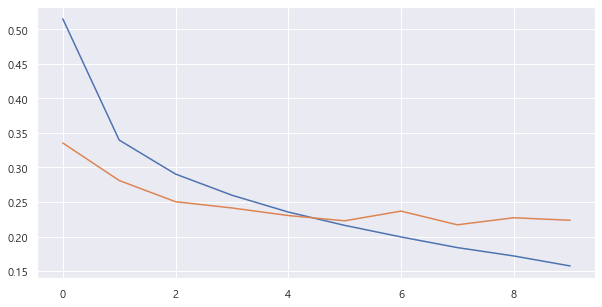

In [19]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [20]:
early_stopping_cb.stopped_epoch

9

In [21]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 9ms/step - loss: 0.2169 - accuracy: 0.9218


[0.21693845093250275, 0.921750009059906]

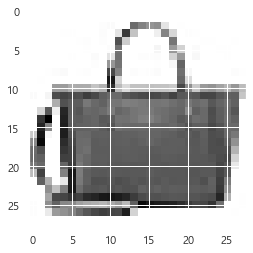

In [22]:
plt.imshow(X=val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [23]:

result = model.predict(val_scaled[0:1])
result

1/1 [==============================] - 0s 107ms/step


array([[2.3537491e-17, 4.9636134e-24, 1.8547918e-20, 8.8074295e-20,
        2.1292830e-18, 1.4648201e-16, 6.1585653e-16, 1.6163556e-17,
        1.0000000e+00, 2.9866742e-18]], dtype=float32)

In [25]:
# 예측
val_labels = np.argmax(model.predict(val_scaled[0:1]),axis=-1)
val_labels

1/1 [==============================] - 0s 20ms/step


array([8], dtype=int64)

In [26]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']

In [28]:
print(classes[np.argmax(result)])

가방
